KNN (IRIS dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/KNN.csv')
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle= True, random_state = 0)


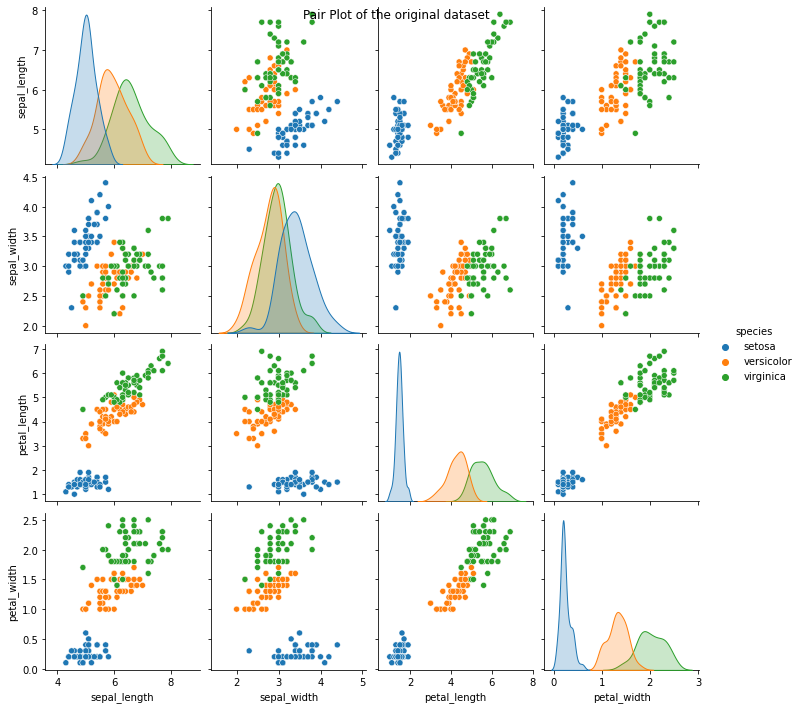

In [ ]:
label = {0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}
plot_org_data = sns.pairplot(dataset.replace({'species': label}), hue= 'species')

plot_org_data.fig.suptitle("Pair Plot of the original dataset")
plt.show()

In [ ]:
scaler = Normalizer()
# scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

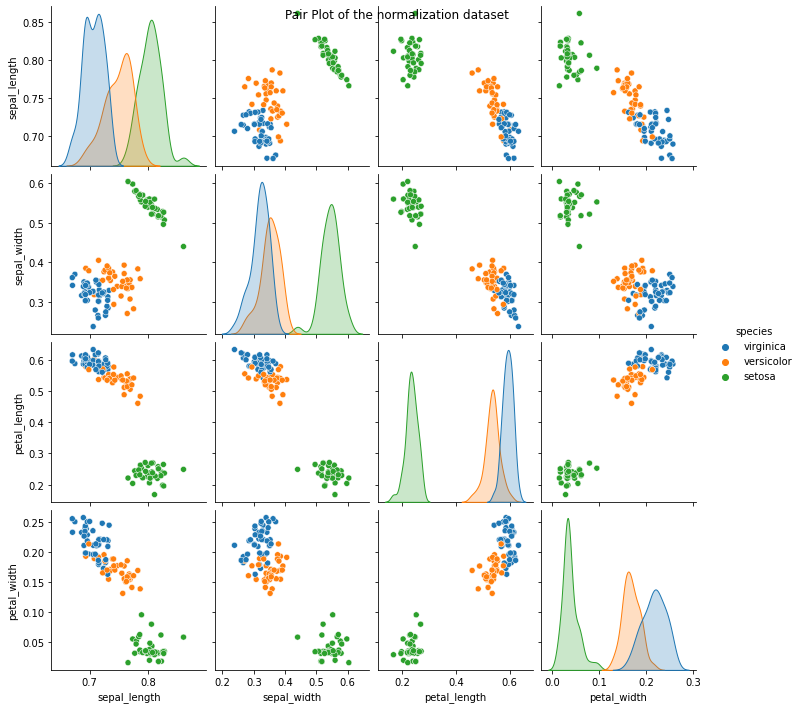

In [ ]:
scaler_train =  pd.DataFrame(data= np.c_[X_train, y_train], columns = dataset.keys())
plot_scaler_data = sns.pairplot(scaler_train.replace({'species': label}), hue= 'species')
plot_scaler_data.fig.suptitle("Pair Plot of the normalization dataset")
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (report)
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


交叉驗證 (Cross-validation) 尋找k值

In [ ]:
from sklearn.model_selection import cross_val_score
xxx = dataset.iloc[:, :-1].values
yyy = dataset.iloc[:, 4].values

scaler = Normalizer()
xxx_scaler = scaler.transform(xxx)

In [ ]:
cv_scores = []
k_list = list(range(1,20,2)) # k = 1, 3, 5, 7, 9, 11, 13, 15, 17, 19

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xxx_scaler, yyy, cv=10, scoring='accuracy') #10 fold
    cv_scores.append(scores.mean())

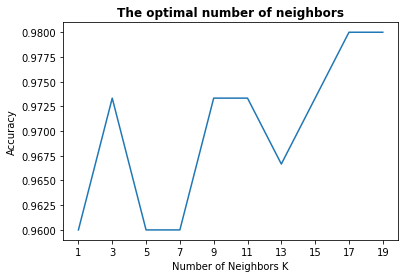

In [ ]:
acc = [x for x in cv_scores]

plt.figure()
plt.title('The optimal number of neighbors', fontweight='bold')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.plot(k_list, acc)
plt.xticks(np.arange(1,20,2))

plt.show()